In [1]:
import pandas as pd
import numpy as np

In [8]:
from sklearn import tree

In [3]:
titanic_data = pd.read_csv("titanic/train.csv")
titanic_data.headad()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [6]:
y = titanic_data.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [17]:
X = X.fillna({'Age': X.Age.median()})

In [23]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [25]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [26]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [30]:
clf.score(X_train, y_train)

0.9798657718120806

In [31]:
clf.score(X_test, y_test)

0.7627118644067796

In [32]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [33]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [35]:
clf.score(X_train, y_train)

0.8406040268456376

In [34]:
clf.score(X_test, y_test)

0.8101694915254237

In [36]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [37]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [38]:
clf.score(X_train, y_train)

0.8238255033557047

In [39]:
clf.score(X_test, y_test)

0.8203389830508474

In [43]:
max_depth_values = range(1, 100)

In [53]:
scores_data = pd.DataFrame()

In [54]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    tmp_score = pd.DataFrame({
        'max_depth': [max_depth], 
        'train_score': [train_score],
        'test_score': [test_score]
    })
    scores_data = scores_data.append(tmp_score)


In [59]:
scores_data

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169
...,...,...,...
0,95,0.979866,0.772881
0,96,0.979866,0.772881
0,97,0.979866,0.786441
0,98,0.979866,0.762712


In [60]:
# scores_data_long = scores_data.melt(scores_data, id_vars='max_depth', value_vars=['test_score', 'train_score'],
#                                    var_name='set_type', value_name='score')

TypeError: melt() got multiple values for argument 'id_vars'

In [63]:
scores_data_long = scores_data.melt(id_vars=['max_depth'], var_name='set_type', value_name='score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
193,95,test_score,0.772881
194,96,test_score,0.772881
195,97,test_score,0.786441
196,98,test_score,0.762712


In [62]:
import seaborn as sns

<AxesSubplot:xlabel='max_depth', ylabel='score'>

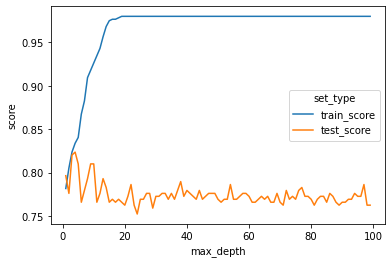

In [65]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [68]:
cross_val_score(clf, X_train, y_train,cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [69]:
cross_val_score(clf, X_train, y_train,cv=5).mean()

0.7886274509803922

In [72]:
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    tmp_score = pd.DataFrame({
        'max_depth': [max_depth], 
        'train_score': [train_score],
        'test_score': [test_score],
        'cross_val_score': [mean_cross_val_score]
    })
    scores_data = scores_data.append(tmp_score)
scores_data


,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.795350
...,...,...,...,...
0,95,0.979866,0.779661,0.761779
0,96,0.979866,0.776271,0.763459
0,97,0.979866,0.769492,0.766821
0,98,0.979866,0.762712,0.776905


In [73]:
scores_data.cross_val_score.max()

0.8070728291316526

In [78]:
scores_data_long = scores_data.melt(id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], 
                                    var_name='set_type', value_name='cv_score')

In [79]:
scores_data_long

,max_depth,set_type,cv_score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.761779
293,96,cross_val_score,0.763459
294,97,cross_val_score,0.766821
295,98,cross_val_score,0.776905


<AxesSubplot:xlabel='max_depth', ylabel='cv_score'>

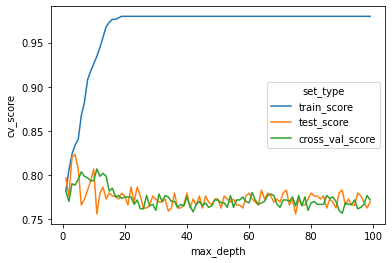

In [80]:
sns.lineplot(data=scores_data_long, x='max_depth', y='cv_score', hue='set_type')

In [83]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,cv_score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.795350
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.798697
205,8,cross_val_score,0.797003
206,9,cross_val_score,0.793627
207,10,cross_val_score,0.793627


In [84]:
scores_data_long.query("set_type == 'cross_val_score'").max()

max_depth                 99
set_type     cross_val_score
cv_score            0.807073
dtype: object

In [93]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [94]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.7898305084745763